# Automatidata project 
**Course 4 - The Power of Statistics**

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# Course 4 End-of-course project: Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 

# **Conduct an A/B test**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


The research question for this data project is: "Is there a significant difference in the fare amount between customers who pay with credit cards and those who pay with cash?"

This question aligns with the goal of determining whether payment method (credit card or cash) has an impact on the fare amount. The goal is to identify whether one payment method leads to higher fare amounts than the other, which could be valuable information for the New York City Taxi & Limousine Commission (TLC) and taxi drivers in making business decisions.

*Complete the following steps to perform statistical analysis of your data:* 

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Before you begin, recall the following Python packages and functions that may be useful:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean() 

*Packages*: pandas, stats.scipy

</details>

In [1]:
# Importing necessary packages
import pandas as pd          # for data manipulation
import numpy as np           # for numerical operations
from scipy import stats      # for statistical tests
import matplotlib.pyplot as plt # for visualization
import seaborn as sns        # for advanced visualization

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


Computing descriptive statistics during Exploratory Data Analysis (EDA) helps data professionals gain a foundational understanding of the dataset by summarizing key characteristics of the data. This includes measures like the mean, median, standard deviation, minimum, and maximum values, which help reveal:

Central tendencies (e.g., average fare amount)

Variability and spread (e.g., how widely fare amounts vary between rides)

Presence of outliers or anomalies

Distribution patterns (e.g., skewness in fare amounts or tip amounts)

Comparison between groups (e.g., average fare paid by credit card vs. cash)

In the context of this A/B test, descriptive statistics allow us to compare the fare amounts paid by customers using credit cards versus those using cash, identify any initial differences, and determine whether a more formal statistical test (like a t-test) is appropriate.

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



           VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
24870114          2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
35634249          1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
38942136          2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
30841670          2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   

           passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
24870114                 6           3.34           1                  N   
35634249                 1           1.80           1                  N   
106203690                1           1.00           1                  N   
38942136                 1           3.70           1                  N   
30841670                 1           4.37           1                  N   

           PULocationID  DOLocationID  payment_type  fare_amount  extra  \
24870114            100           231    

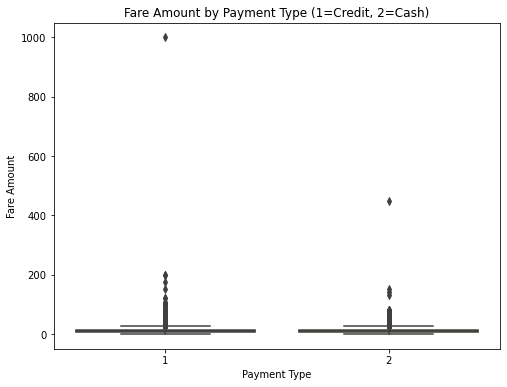

In [4]:
# Display the first few rows of the dataset
print(taxi_data.head())

# Basic info about the dataset
print(taxi_data.info())

# Descriptive statistics for the full fare_amount column
print("\nOverall descriptive statistics for fare_amount:")
print(taxi_data['fare_amount'].describe())

# Count of each payment type
print("\nPayment type counts:")
print(taxi_data['payment_type'].value_counts())

# Filter the dataset for credit card (1) and cash (2) payments only
ab_data = taxi_data[taxi_data['payment_type'].isin([1, 2])]

# Check if any null values exist in the relevant columns
print("\nNull values in filtered dataset:")
print(ab_data[['fare_amount', 'payment_type']].isnull().sum())

# Drop rows with missing fare_amount values if any
ab_data = ab_data.dropna(subset=['fare_amount'])

# Descriptive statistics grouped by payment_type
print("\nDescriptive statistics by payment_type:")
print(ab_data.groupby('payment_type')['fare_amount'].describe())

# Optional: Add boxplot for visual comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=ab_data)
plt.title('Fare Amount by Payment Type (1=Credit, 2=Cash)')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.show()

You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [5]:
# Calculate the average fare amount for each payment type
average_fare_by_payment = taxi_data.groupby('payment_type')['fare_amount'].mean()

# Display the results
print("Average fare amount by payment type:")
print(average_fare_by_payment)

Average fare amount by payment type:
payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.


### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [6]:
from scipy.stats import ttest_ind

# Subset the data for credit card and cash payments
credit_card_fares = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash_fares = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']

# Drop any missing values
credit_card_fares = credit_card_fares.dropna()
cash_fares = cash_fares.dropna()

# Set the significance level
alpha = 0.05

# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value = ttest_ind(credit_card_fares, cash_fares, equal_var=False)

# Output the test statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Draw conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average fare amount between credit card and cash payments.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average fare amount between credit card and cash payments.")

T-statistic: 6.866800855655372
P-value: 6.797387473030518e-12
Reject the null hypothesis: There is a statistically significant difference in average fare amount between credit card and cash payments.


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?

The hypothesis test revealed a statistically significant difference in the average fare amount between credit card and cash payments. Specifically, the data shows that customers who pay with credit cards tend to pay higher fares on average than those who pay with cash. This insight could imply that promoting or incentivizing credit card usage may lead to increased revenue for taxi drivers and the New York City TLC.

2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

Random Assignment Assumption: In real-world settings, customers self-select their payment method. The test assumes customers were randomly assigned to pay with either cash or credit, which rarely happens outside controlled experiments. Without true randomization, causation cannot be confidently inferred.

External Confounders: Factors such as trip distance, pickup location, time of day, or passenger income level may influence both payment method and fare amount. These variables are not controlled for in this simple comparison.

Outliers in the Data: Fare amounts include extreme values (e.g., minimums of 0 or even negative, and maximums over $999), which may distort averages and violate t-test assumptions.

Sample Representativeness: The dataset used is a subset of total rides and may not be representative of all NYC taxi trips or customer behaviors.